## Visualize and Analyze EDX data

In [1]:
from functions import *

visualize quickly a map - only works if you have coordinates written

In [ ]:
folder = r"O:\Nlab\Public\DCH-plasma\phosphosulfides_students\Students\Giulia\01_Characterization\layerprobe\anait_0001_BaS_Zr"
filepath = os.path.join(folder, "anait_0001_BR.xlsx")
new_heatmap("Layer 1 Ba Atomic %", filepath=filepath, title = "anait_0001_BR", 
#savepath = os.path.join(folder, "test.html")
)

loading data from excels file

In [11]:
folderpath = r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\eugbe_0003_Sb\EDX"
sample = "eugbe_0003"
sample_n = 3

pos = ["BR",
        "FR",
        "FL", 
        "BL"
        ]
names = [sample+"_"+pos[i] for i in range(0,len(pos))]

IF NEEDED: translate the excel files

In [ ]:
for i in range(0,len(pos)):
    file = sample+"_"+pos[i]+".xlsx"
    filepath = os.path.join(folder, file)
    new_path = os.path.join(folder, sample+"_"+pos[i]+"_translated.xlsx")
    lp_translate_excel(filepath, new_path)

IF NEEDED: add coordinated to the excel files


In [6]:
for i in range(0,len(names)): 
    filepath= os.path.join(folderpath, names[i]+".xlsx")
    new_path = os.path.join(folderpath, names[i]+ "_coords"+".xlsx")

    if names[i] == sample +"_BR":

        X,Y, grid_input, areax, areay = EDS_coordinates(4, 6, 30000, 70000, filepath, new_path, edge = 4 )
        print(names[i], areax, X)

    if names[i] == sample +"_FR":
        X,Y, grid_input, areax, areay = EDS_coordinates(4, 6, 30000, 70000, filepath, new_path, edge = 3 )
        print(names[i], areax, X)

    if names[i] == sample +"_FL":
        X,Y, grid_input, areax, areay = EDS_coordinates(4, 6, 30000, 70000, filepath, new_path, edge= 3 )
        print(names[i], areax, X)
    
    if names[i] == sample +"_BL":
        X,Y, grid_input, areax, areay = EDS_coordinates(4, 6, 30000, 70000, filepath, new_path, edge= 3 )
        print(names[i], areax, X)

eugbe_0003_BR 0.013666666666666666 [-14.37, -14.37, -14.37, -14.37, -14.37, -14.37, -4.79, -4.79, -4.79, -4.79, -4.79, -4.79, 4.79, 4.79, 4.79, 4.79, 4.79, 4.79, 14.37, 14.37, 14.37, 14.37, 14.37, 14.37]
eugbe_0003_FR 0.013666666666666666 [-14.37, -14.37, -14.37, -14.37, -14.37, -14.37, -4.79, -4.79, -4.79, -4.79, -4.79, -4.79, 4.79, 4.79, 4.79, 4.79, 4.79, 4.79, 14.37, 14.37, 14.37, 14.37, 14.37, 14.37]
eugbe_0003_FL 0.013666666666666666 [-14.37, -14.37, -14.37, -14.37, -14.37, -14.37, -4.79, -4.79, -4.79, -4.79, -4.79, -4.79, 4.79, 4.79, 4.79, 4.79, 4.79, 4.79, 14.37, 14.37, 14.37, 14.37, 14.37, 14.37]
eugbe_0003_BL 0.013666666666666666 [-14.37, -14.37, -14.37, -14.37, -14.37, -14.37, -4.79, -4.79, -4.79, -4.79, -4.79, -4.79, 4.79, 4.79, 4.79, 4.79, 4.79, 4.79, 14.37, 14.37, 14.37, 14.37, 14.37, 14.37]


load the data

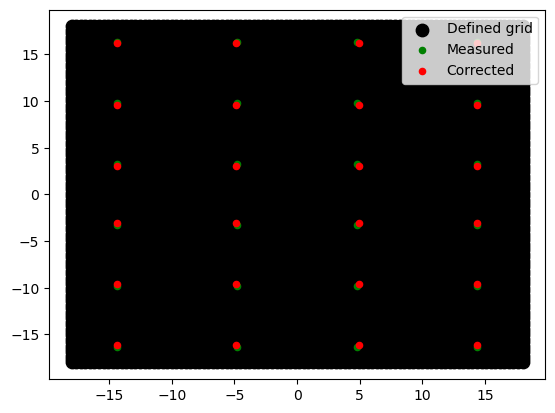

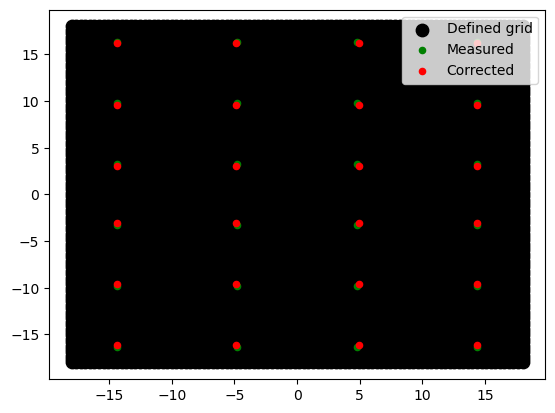

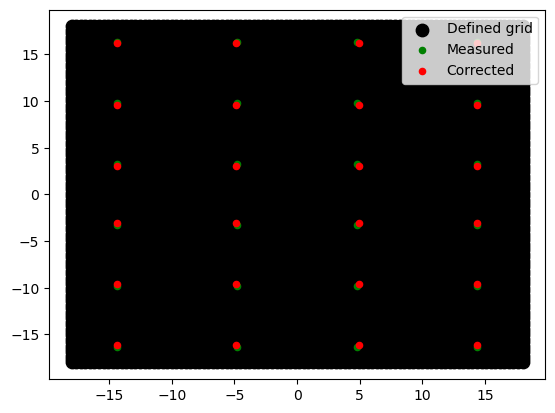

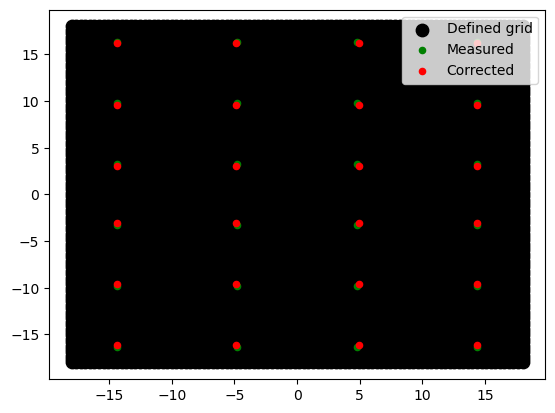

In [7]:
data_BR = pd.DataFrame()
data_FR = pd.DataFrame()
data_FL = pd.DataFrame()
data_BL = pd.DataFrame()
datas= [data_BR, 
        data_FR,
        data_FL,
        data_BL,
         ]

for i in range(0,len(pos)):
    file = sample+"_"+pos[i]+"_coords.xlsx" #change to coords or translated if needed
    filepath = os.path.join(folderpath, file)
    grid = measurement_grid(100,100,36,36,-18,-18)
    datas[i], coords = read_layerprobe(filepath, grid, sheetname="Sheet1")
    plt.figure()
    plot_grid(coords, grid)

data__BR, coords_BR = translate_data(datas[0], 20,20)
data__FR, coords_FR = translate_data(datas[1], 20,-20)
data__FL, coords_FL = translate_data(datas[2], -20,-20)
data__BL, coords_BL = translate_data(datas[1], -20,20)

data = combine_data((data__BR,
                      data__FR,
                      data__FL, 
                      data__BL
                     ))
data0= data.copy()

#### add a column with sample ID to the data

In [12]:
headerlength = len(data.columns.get_level_values(1).unique())
k=0
data = data0.copy()
for i in range(0, len(data.columns.get_level_values(0).unique())):
    print(data.columns.get_level_values(0).unique()[i])
    data.insert(headerlength*(i+1)+k, "{}".format(data.columns.get_level_values(0).unique()[i]), sample_n, allow_duplicates=True)
    data.rename(columns={'': 'Sample ID'}, inplace = True)
    k=k+1
new_data = data.copy()
print(data.columns.get_level_values(1))

5.640000000000001,3.8200000000000003
5.640000000000001,10.36
5.640000000000001,16.91
5.640000000000001,23.09
5.640000000000001,29.64
5.640000000000001,36.18
15.09,3.8200000000000003
15.09,10.36
15.09,16.91
15.09,23.09
15.09,29.64
15.09,36.18
24.91,3.8200000000000003
24.91,10.36
24.91,16.91
24.91,23.09
24.91,29.64
24.91,36.18
34.36,3.8200000000000003
34.36,10.36
34.36,16.91
34.36,23.09
34.36,29.64
34.36,36.18
5.640000000000001,-36.18
5.640000000000001,-29.64
5.640000000000001,-23.09
5.640000000000001,-16.91
5.640000000000001,-10.36
5.640000000000001,-3.8200000000000003
15.09,-36.18
15.09,-29.64
15.09,-23.09
15.09,-16.91
15.09,-10.36
15.09,-3.8200000000000003
24.91,-36.18
24.91,-29.64
24.91,-23.09
24.91,-16.91
24.91,-10.36
24.91,-3.8200000000000003
34.36,-36.18
34.36,-29.64
34.36,-23.09
34.36,-16.91
34.36,-10.36
34.36,-3.8200000000000003
-34.36,-36.18
-34.36,-29.64
-34.36,-23.09
-34.36,-16.91
-34.36,-10.36
-34.36,-3.8200000000000003
-24.91,-36.18
-24.91,-29.64
-24.91,-23.09
-24.91,-16.91

#### plot heatmaps

In [9]:
datatypes=["Layer 1 Thickness (nm)", "Layer 1 Sb Atomic %", "Layer 1 P Atomic %"] 

for datatype in datatypes:
    savepath = os.path.join(folderpath, f"{sample} {datatype}.png")
    new_heatmap(datatype, data=data, title = f"{sample} {datatype}",
    savepath=savepath,
     )

In [13]:
#%% ------------------export pickle to use elsewhere ---------------------

pickel_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\eugbe_pickles"
with open(os.path.join(pickel_path, sample+"_EDS.pkl"), 'wb') as f:
    pickle.dump(new_data, f)